In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; font-size: 30px; color: red;">Audio Data Loading & Basic Inspection</div>

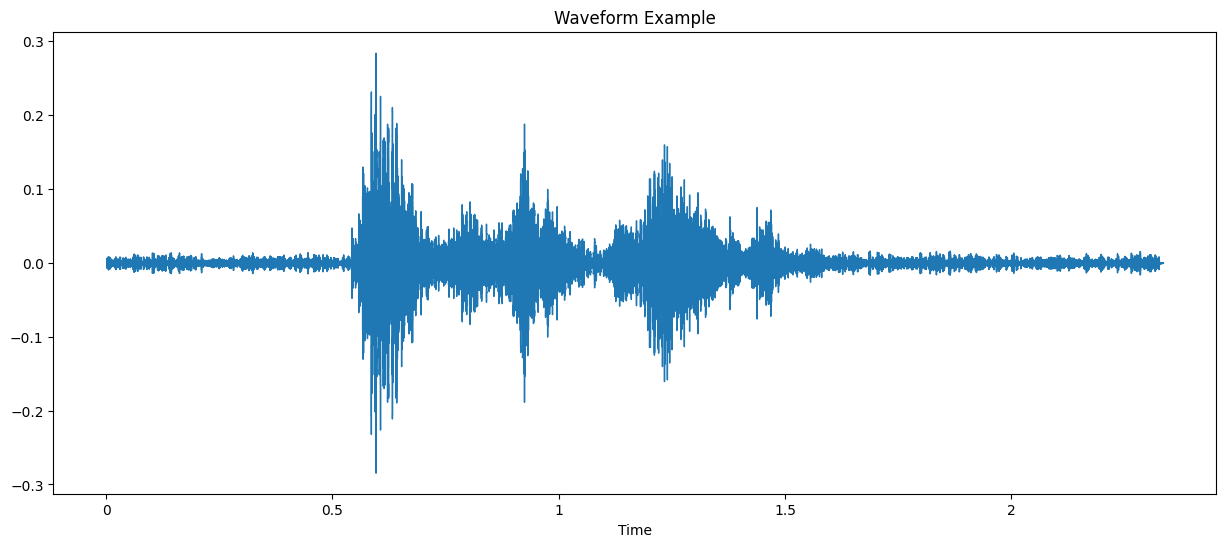

In [2]:
# Load sample
data, sr = librosa.load("../data/1001_DFA_DIS_XX.wav", sr = None, mono=False)

# Plot waveform
plt.figure(figsize=(15, 6))
librosa.display.waveshow(y=data, x_axis='time', sr=sr)
plt.title("Waveform Example")
plt.show()

In [3]:
# Play Audio
ipd.Audio("../data/1001_DFA_DIS_XX.wav")

In [4]:
# Check number of channels
if data.ndim == 1:
    print("File is a Mono Channel")
elif data.ndim == 2:
    print("File is Stereo Channel")

File is a Mono Channel


<div style="text-align: center; font-size: 30px; color: red;">Exploratory Data Analysis</div>

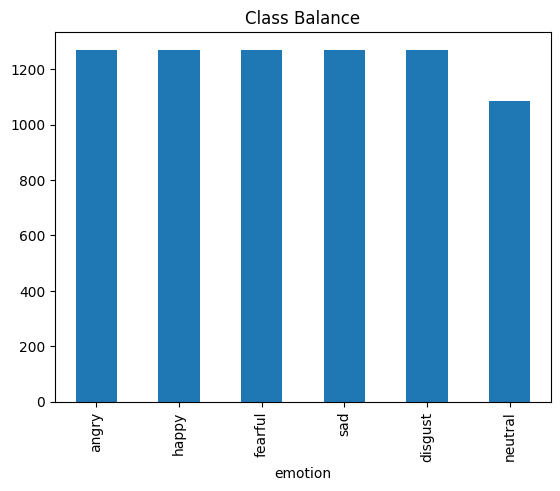

In [5]:
# Check for Class Imbalance
emotion_map = {
        'ANG': 'angry', 'DIS': 'disgust', 'FEA': 'fearful',
        'HAP': 'happy', 'NEU': 'neutral', 'SAD': 'sad'
}
emotions = []
for dirpath, dirnames, filenames in os.walk("../data"):
    for file in filenames:
        emotion = emotion_map[file.split('_')[-2]]
        emotions.append(emotion)
df = pd.DataFrame(emotions)
df.columns = ["emotion"]
df["emotion"].value_counts().plot(kind='bar')
plt.title("Class Balance");

**NOTE**
- All classes balanced except neutral. Consider resampling?